<a href="https://colab.research.google.com/github/baussel/Satellite_Detection/blob/main/Processing_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Postprocessing and Analysis of Results



---


*Ben Aussel, September 2021, ESA*


---



## Google Drive & Modules

In [1]:
#Mount Google Drive with this Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#Modules
from PIL import Image
import PIL
import os
import numpy as np
import pandas as pd
import glob
import json
from shutil import copyfile
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

## Data post-processing

### ACS

#### All Images

In [ ]:
#Get filenames after deleting
filenames = glob.glob("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/ACS_Comp_Raw/*")
for i in range(len(filenames)):
    filenames[i] = filenames[i].replace("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/ACS_Comp_Raw","")
data_satellites = pd.DataFrame(filenames,columns=["filename"])
print(data_satellites)
data_satellites.to_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_ACS.csv")

                      filename
0      j59l54010_j59l54geq.jpg
1      j59l54010_j59l54ghq.jpg
2      j59l54010_j59l54gjq.jpg
3      j59l54010_j59l54grq.jpg
4      j59l54010_j59l54gwq.jpg
...                        ...
78205  jegr01010_jegr01pzq.jpg
78206  jegr01010_jegr01q1q.jpg
78207  jegr01010_jegr01q3q.jpg
78208  jehc75010_jehc75pwq.jpg
78209  jehc75010_jehc75q1q.jpg

[78210 rows x 1 columns]


In [ ]:
results = []
for i in tqdm(range(len(data_satellites))):
    row = data_satellites[i:i+1]
    name = row["filename"].to_numpy()[0].split(".")[0]
    obs_id, raw_id = name.split("_")[0], name.split("_")[1]
    data_row = data_ACS.loc[data_ACS["observation_id"]==raw_id]
    data_row["composite_id"] = obs_id
    results.append(data_row)
data_result = pd.concat(results)
data_result.to_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_ACS_params.csv")

  0%|                                                                                        | 0/78210 [00:00<?, ?it/s]<ipython-input-18-e33c7287f418>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_row["composite_id"] = obs_id
100%|███████████████████████████████████████████████████████████████████████████| 78210/78210 [09:48<00:00, 132.89it/s]


#### Images with satellite trails

In [ ]:
#Get filenames after deleting
filenames = glob.glob("/content/drive/MyDrive/ESA/Results/processed/ACS/*")
for i in range(len(filenames)):
    filenames[i] = filenames[i].replace("/content/drive/MyDrive/ESA/Results/processed/ACS\\","")
data_satellites = pd.DataFrame(filenames,columns=["filename"])
print(data_satellites)
data_satellites.to_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_ACS_processed.csv")

                     filename
0     j6fl1e010_j6fl1elvq.jpg
1     j6fl23010_j6fl23pyq.jpg
2     j6fl6c010_j6fl6cilq.jpg
3     j6fl6x020_j6fl6xfuq.jpg
4     j6fl7b010_j6fl7bpoq.jpg
...                       ...
2573  jeex02020_jeex02qaq.jpg
2574  jeex02020_jeex02rvq.jpg
2575  jeex03010_jeex03p8q.jpg
2576  jeex03010_jeex03puq.jpg
2577  jeexa4010_jeexa4idq.jpg

[2578 rows x 1 columns]


In [ ]:
results = []
for i in tqdm(range(len(data_satellites))):
    row = data_satellites[i:i+1]
    name = row["filename"].to_numpy()[0].split(".")[0]
    obs_id, raw_id = name.split("_")[0], name.split("_")[1]
    data_row = data_ACS.loc[data_ACS["observation_id"]==raw_id]
    data_row["composite_id"] = obs_id
    results.append(data_row)
data_result = pd.concat(results)
data_result.to_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_ACS_processed_params.csv")

  0%|                                                                                         | 0/2578 [00:00<?, ?it/s]<ipython-input-24-be660f706a59>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_row["composite_id"] = obs_id
100%|█████████████████████████████████████████████████████████████████████████████| 2578/2578 [00:19<00:00, 132.50it/s]


### WFC3/UVIS

#### All Images

In [ ]:
#Get filenames after deleting
filenames = glob.glob("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/WFC3_UVIS_Comp_Raw/*")
for i in range(len(filenames)):
    filenames[i] = filenames[i].replace("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/WFC3_UVIS_Comp_Raw\\","")
data_satellites = pd.DataFrame(filenames,columns=["filename"])
print(data_satellites)
data_satellites.to_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_WFC3.csv")

                      filename
0      ia2l51030_ia2l51ukq.jpg
1      ia2l51030_ia2l51urq.jpg
2      ia2l51030_ia2l51uwq.jpg
3      ia2l52030_ia2l52srq.jpg
4      ia2l52030_ia2l52svq.jpg
...                        ...
61514  iejc02010_iejc02kpq.jpg
61515  iejc02010_iejc02kqq.jpg
61516  iejc02010_iejc02krq.jpg
61517  iejc02010_iejc02ksq.jpg
61518  iejc02010_iejc02ktq.jpg

[61519 rows x 1 columns]


In [ ]:
results = []
for i in tqdm(range(len(data_satellites))):
    row = data_satellites[i:i+1]
    name = row["filename"].to_numpy()[0].split(".")[0]
    obs_id, raw_id = name.split("_")[0], name.split("_")[1]
    data_row = data_WFC3_UVIS.loc[data_WFC3_UVIS["observation_id"]==raw_id]
    data_row["composite_id"] = obs_id
    results.append(data_row)
data_result = pd.concat(results)
data_result.to_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_WFC3_params.csv")

  0%|                                                                                        | 0/61519 [00:00<?, ?it/s]<ipython-input-20-68dd9fe9c197>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_row["composite_id"] = obs_id
100%|███████████████████████████████████████████████████████████████████████████| 61519/61519 [07:16<00:00, 141.04it/s]


#### Images with satellite trails

In [ ]:
#Get filenames after deleting
filenames = glob.glob("/content/drive/MyDrive/ESA/Results/processed/WFC3/*")
for i in range(len(filenames)):
    filenames[i] = filenames[i].replace("/content/drive/MyDrive/ESA/Results/processed/WFC3\\","")
data_satellites = pd.DataFrame(filenames,columns=["filename"])
print(data_satellites)
data_satellites.to_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_WFC3_processed.csv")

                    filename
0    ib1f31020_ib1f31e9q.jpg
1    ib1f32020_ib1f32uzq.jpg
2    ib1f33010_ib1f33q8q.jpg
3    ib1f35010_ib1f35igq.jpg
4    ib1f36030_ib1f36aqq.jpg
..                       ...
835  ieh807010_ieh807blq.jpg
836  ieh807020_ieh807bmq.jpg
837  ieh807020_ieh807bnq.jpg
838  iehh02010_iehh02rjq.jpg
839  iej501040_iej501snq.jpg

[840 rows x 1 columns]


In [ ]:
results = []
for i in tqdm(range(len(data_satellites))):
    row = data_satellites[i:i+1]
    name = row["filename"].to_numpy()[0].split(".")[0]
    obs_id, raw_id = name.split("_")[0], name.split("_")[1]
    data_row = data_WFC3_UVIS.loc[data_WFC3_UVIS["observation_id"]==raw_id]
    data_row["composite_id"] = obs_id
    results.append(data_row)
data_result = pd.concat(results)
data_result.to_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_WFC3_processed_params.csv")

  0%|                                                                                          | 0/840 [00:00<?, ?it/s]<ipython-input-35-44bdfa9fa666>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_row["composite_id"] = obs_id
100%|███████████████████████████████████████████████████████████████████████████████| 840/840 [00:03<00:00, 225.61it/s]


### WFC3/IR

#### All Images

In [ ]:
#Get filenames after deleting
filenames = glob.glob("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/WFC3_IR_Comp_Raw/*")
for i in range(len(filenames)):
    filenames[i] = filenames[i].replace("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/WFC3_IR_Comp_Raw\\","")
data_satellites = pd.DataFrame(filenames,columns=["filename"])
print(data_satellites)
data_satellites.to_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_IR.csv")

                      filename
0      i9zf01010_i9zf01dzq.jpg
1      i9zf01010_i9zf01e0q.jpg
2      i9zf01010_i9zf01e1q.jpg
3      i9zf01010_i9zf01e3q.jpg
4      i9zf02010_i9zf02z6q.jpg
...                        ...
84684  iejm02010_iejm02doq.jpg
84685  iejm02020_iejm02dfq.jpg
84686  iejm02020_iejm02djq.jpg
84687  iejm02020_iejm02dmq.jpg
84688  iejm02020_iejm02dqq.jpg

[84689 rows x 1 columns]


In [ ]:
results = []
for i in tqdm(range(len(data_satellites))):
    row = data_satellites[i:i+1]
    name = row["filename"].to_numpy()[0].split(".")[0]
    obs_id, raw_id = name.split("_")[0], name.split("_")[1]
    data_row = data_IR.loc[data_IR["observation_id"]==raw_id]
    data_row["composite_id"] = obs_id
    results.append(data_row)
data_result = pd.concat(results)
data_result.to_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_IR_params.csv")

  0%|                                                                                        | 0/84689 [00:00<?, ?it/s]<ipython-input-5-197c658a39bb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_row["composite_id"] = obs_id
100%|███████████████████████████████████████████████████████████████████████████| 84689/84689 [09:16<00:00, 152.10it/s]


#### Images with satellite trails

In [ ]:
#Get filenames after deleting
filenames = glob.glob("/content/drive/MyDrive/ESA/Results/processed/IR/*")
for i in range(len(filenames)):
    filenames[i] = filenames[i].replace("Results/processed/IR\\","")
data_satellites = pd.DataFrame(filenames,columns=["filename"])
print(data_satellites)
data_satellites.to_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_IR_processed.csv")

                    filename
0    i9zf03010_i9zf03gcq.jpg
1    i9zf13010_i9zf13chq.jpg
2    i9zg01010_i9zg01g2q.jpg
3    ia1e27010_ia1e27kbq.jpg
4    ia1l76010_ia1l76lqq.jpg
..                       ...
646  iedwa7010_iedwa7d7q.jpg
647  iedwan010_iedwano6q.jpg
648  ieel83020_ieel83afq.jpg
649  ieer01010_ieer01g1q.jpg
650  iejm02010_iejm02dkq.jpg

[651 rows x 1 columns]


In [ ]:
results = []
for i in tqdm(range(len(data_satellites))):
    row = data_satellites[i:i+1]
    name = row["filename"].to_numpy()[0].split(".")[0]
    obs_id, raw_id = name.split("_")[0], name.split("_")[1]
    data_row = data_IR.loc[data_IR["observation_id"]==raw_id]
    data_row["composite_id"] = obs_id
    results.append(data_row)
data_result = pd.concat(results)
data_result.to_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_IR_processed_params.csv")

  0%|                                                                                          | 0/651 [00:00<?, ?it/s]<ipython-input-9-f4f3af4f0e87>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_row["composite_id"] = obs_id
100%|███████████████████████████████████████████████████████████████████████████████| 651/651 [00:05<00:00, 118.39it/s]


## Analysis

### Import of Data

In [4]:
data_ACS = pd.read_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_ACS_params.csv")
data_WFC3_UVIS = pd.read_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_WFC3_params.csv")
data_IR = pd.read_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_IR_params_images.csv")

In [3]:
data_sats_ACS = pd.read_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_ACS_processed_params.csv")
data_sats_WFC3_UVIS = pd.read_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_WFC3_processed_params.csv")
data_sats_IR = pd.read_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_IR_processed_params.csv")

In [5]:
bins_mjd = [52275,52640,53005,53371,53736,54101,54466,54832,55197,55562,55927,56293,56658,57023,57388,57754,58119,58484,58849,59215,59580]
years = [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

### Plots for different years

#### All images



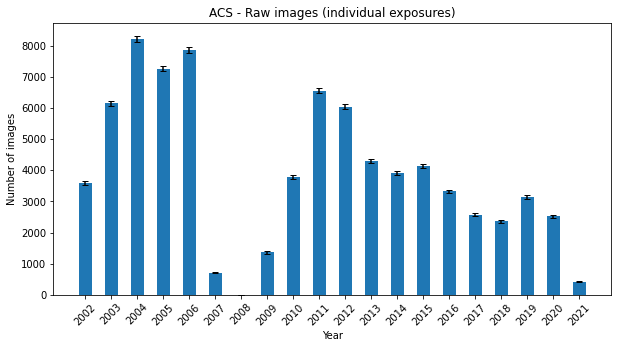

In [36]:
#ACS
hist_ACS = np.histogram(data_ACS["start_time_mjd"],bins=bins_mjd)

plt.figure(figsize=(10,5))
plt.title("ACS - Raw images (individual exposures)")
plt.bar(years,hist_ACS[0],yerr=np.sqrt(hist_ACS[0]), width=0.5,capsize=3)
plt.xlabel("Year")
plt.ylabel("Number of images")
plt.xticks(years,rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_all_images_years.png",dpi=100)

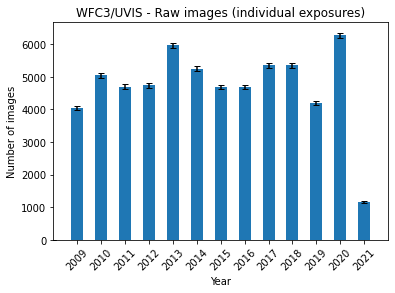

In [37]:
#WFC3/UVIS
hist_WFC3 = np.histogram(data_WFC3_UVIS["start_time_mjd"],bins=bins_mjd)

plt.title("WFC3/UVIS - Raw images (individual exposures)")
plt.bar(years,hist_WFC3[0], width=0.5, yerr=np.sqrt(hist_WFC3[0]),capsize=3)
plt.xlabel("Year")
plt.ylabel("Number of images")
plt.xticks(years[7:],rotation=45)
plt.xlim(2008,2022)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_all_images_years.png",dpi=100)

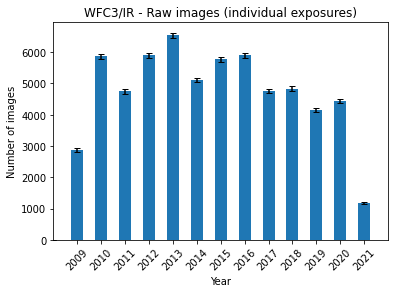

In [38]:
#WFC3/IR
hist_IR = np.histogram(data_IR["start_time_mjd"],bins=bins_mjd)

plt.title("WFC3/IR - Raw images (individual exposures)")
plt.bar(years,hist_IR[0], width=0.5, yerr=np.sqrt(hist_IR[0]),capsize=3)
plt.xlabel("Year")
plt.ylabel("Number of images")
plt.xticks(years[7:],rotation=45)
plt.xlim(2008,2022)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_all_images_years.png",dpi=100)

#### Images with satellite trails

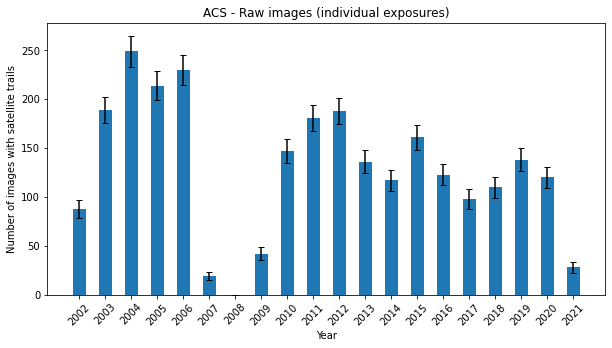

In [39]:
#ACS
hist_sats_ACS = np.histogram(data_sats_ACS["start_time_mjd"],bins=bins_mjd)

plt.figure(figsize=(10,5))
plt.title("ACS - Raw images (individual exposures)")
plt.bar(years,hist_sats_ACS[0], width=0.5, yerr=np.sqrt(hist_sats_ACS[0]),capsize=3)
plt.xlabel("Year")
plt.ylabel("Number of images with satellite trails")
plt.xticks(years,rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_images_satellites_years.png",dpi=100)

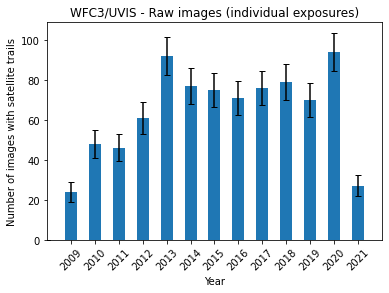

In [40]:
#WFC3/UVIS
hist_sats_WFC3 = np.histogram(data_sats_WFC3_UVIS["start_time_mjd"],bins=bins_mjd)

plt.title("WFC3/UVIS - Raw images (individual exposures)")
plt.bar(years,hist_sats_WFC3[0], width=0.5, yerr=np.sqrt(hist_sats_WFC3[0]),capsize=3)
plt.xlabel("Year")
plt.ylabel("Number of images with satellite trails")
plt.xticks(years[7:],rotation=45)
plt.xlim(2008,2022)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_images_satellites_years.png",dpi=100)

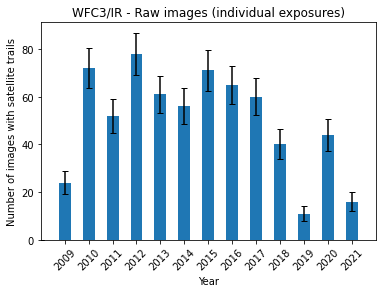

In [41]:
#WFC3/IR
hist_sats_IR = np.histogram(data_sats_IR["start_time_mjd"],bins=bins_mjd)

plt.title("WFC3/IR - Raw images (individual exposures)")
plt.bar(years,hist_sats_IR[0], width=0.5, yerr=np.sqrt(hist_sats_IR[0]),capsize=3)
plt.xlabel("Year")
plt.ylabel("Number of images with satellite trails")
plt.xticks(years[7:],rotation=45)
plt.xlim(2008,2022)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_images_satellites_years.png",dpi=100)

#### Fraction of images

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


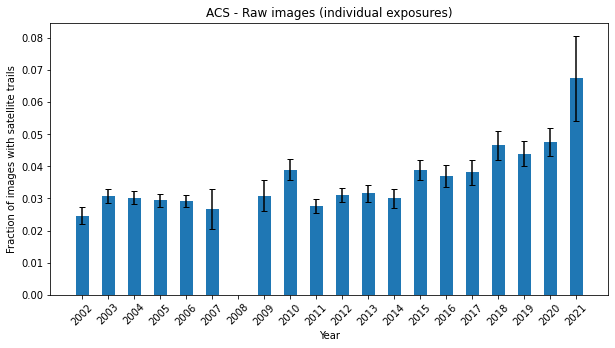

In [42]:
#ACS
fraction_ACS = hist_sats_ACS[0]/hist_ACS[0]
u_fraction_ACS = np.sqrt(hist_sats_ACS[0]/(hist_ACS[0]**2)+(hist_sats_ACS[0]**2/(hist_ACS[0]**3)))

plt.figure(figsize=(10,5))
plt.title("ACS - Raw images (individual exposures)")
plt.bar(years,fraction_ACS, width=0.5, yerr=u_fraction_ACS,capsize=3)
plt.xlabel("Year")
plt.ylabel("Fraction of images with satellite trails")
plt.xticks(years,rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_fraction_years.png",dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


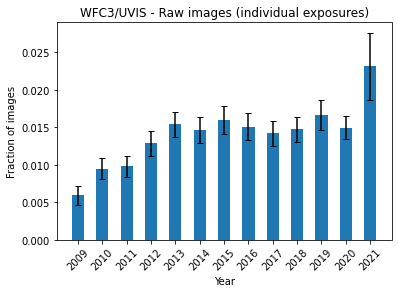

In [43]:
#WFC3/UVIS
fraction_WFC3 = hist_sats_WFC3[0]/hist_WFC3[0]
u_fraction_WFC3 = np.sqrt(hist_sats_WFC3[0]/(hist_WFC3[0]**2)+(hist_sats_WFC3[0]**2/(hist_WFC3[0]**3)))

plt.title("WFC3/UVIS - Raw images (individual exposures)")
plt.bar(years,fraction_WFC3, width=0.5, yerr=u_fraction_WFC3,capsize=3)
plt.xlabel("Year")
plt.ylabel("Fraction of images")
plt.xticks(years[7:],rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_fraction_years.png",dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


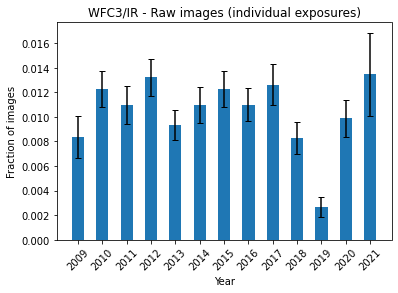

In [44]:
#WFC3/IR
fraction_IR = hist_sats_IR[0]/hist_IR[0]
u_fraction_IR = np.sqrt(hist_sats_IR[0]/(hist_IR[0]**2)+(hist_sats_IR[0]**2/(hist_IR[0]**3)))

plt.title("WFC3/IR - Raw images (individual exposures)")
plt.bar(years,fraction_IR, width=0.5, yerr=u_fraction_IR,capsize=3)
plt.xlabel("Year")
plt.ylabel("Fraction of images")
plt.xticks(years[7:],rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_fraction_years.png",dpi=100)